# $M^2$ Theoretical Frameworks

**Scott Prahl**

**June 2020, version 3**

It turns out that real beams differ from perfect Gaussian beams.  Specifically, they diverge more quickly or don't focus to the same size spot.  The beam propagation factor $M^2$ is a measure of how close a beam is to Gaussian (TEM$_{00}$ mode).  Unfortunately, the theoretical frameworks are nearly identical but with subtle differences.  This notebook attempts to lay out the various frameworks and to explain the ISO 11146 method of measuring $M^2$

Johnston and Sasnett write in their chapter "Characterization of Laser Beams: The M$^2$ Model" in the *Handbook of Optical and Laser Scanning*, Marcel Dekker, (2004)::

> Unlike the fundamental mode beam where the 1/e$^2$-diameter definition is universally understood and applied, for mixed modes a number of different diameter definitions have been employed. The different definitions have in common that they all reduce to the 1/e$^2$-diameter when applied to an $M^2=1$ fundamental mode beam, but when applied to a mixed mode with higher order mode content, they in general give different numerical values. As $M^2$ always depends on a product of two measured diameters, its numerical value changes also as the square of that for diameters. It is all the same beam, but different methods provide results in different currencies; one has to specify what currency is in use and know the exchange rate.

For more information, see Ross, *Laser Beam Quality Metrics*, SPIE Press, 2013.

M. W. Sasnett and T. F. Johnston, Jr., “Beam characterization and measurement of propagation attributes,” in Laser Beam Diagnostics: Proc. SPIE 1414, Los Angeles CA (January 1991).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs


## $M^2$ or the beam propagation factor

$M^2$ is defined as the ratio of the beam parameter product (BPP) for a real beam to that for a perfect Gaussian (TEM$_{00}$) beam

$$
M^2 = \frac{\mathrm{BPP}}{\mathrm{BPP}_{00}} = \frac{\Theta \cdot w}{\Theta_{00}\cdot w_{00}}
$$

where $\Theta$ is the far-field beam divergence and $w$ is the minimum beam radius.  The 00 subscript indicates parameters for the TEM$_{00}$ or fundamental gaussian mode.  These are

$$
\Theta_{00} = \frac{\lambda}{\pi w_{00}}
$$

and so the beam parameter product for the TEM$_{00}$ mode is

$$
\mathrm{BPP}_{00} = \frac{\lambda}{\pi}
$$

Therefore the beam quality factor can be written

$$
M^2 =  \frac{\Theta \cdot w}{\lambda\cdot \pi}
$$

A Gaussian beam has $M^2=1$, while all other beams will have $M^2>1$.  Moreover,

* for a given *beam radius*, the Gaussian beam has the smallest possible beam divergence

* for a given *beam divergence*, the Gaussian beam has the smallest possible beam radius. 


## Multimode Gaussian beam propagation

The Gaussian beam propagation model is simple and widely used.  It is natural to try to leverage the same for multimode beams as well but including $M^2$ as an additional parameter.

There are three common multimodal beam propagation formulations.

### Illuminator or matching waist

The first is the *illuminator* or *constant waist* that is used when the the minimum beam size is known.  In this case the beam radius is

$$
w_\mathrm{illuminator}^2(z)=w_{00}^2\cdot\left[1+M^4\left( \frac{\lambda}{\pi w_{00}^2}  \right)^2 (z-z_0)^2\right] =w_{00}^2\cdot\left[ 1+ M^4\left(\frac{z-z_0}{z_{R00}}\right)^2\right]
$$

In this case $M^2$ represents how much more real beams diverge than pure Gaussian beams.  We find that the beam divergence is $M^2$ times larger than that of a fundamental Gaussian beam with the same beam waist.

$$
\Theta = M^2 \Theta_{00}
$$

and the beam waists match

$$
w(z0) = w_{00}
$$


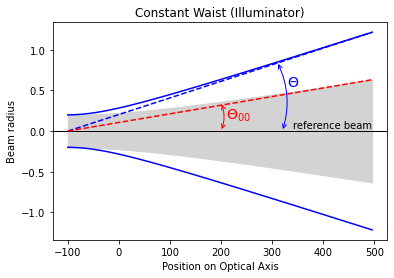

In [3]:

M2=2
w0=0.1                    # radius of beam waist [mm]
z0=-100                   # z-axis position of beam waist [mm]
lambda0=0.6328/1000       # again in mm
M = np.sqrt(M2)
zR = M2 * lbs.z_rayleigh(w0, lambda0)
z = np.linspace(0,6*zR,100)-100
r = lbs.beam_radius(w0, lambda0, z, M2=M2, z0=z0)
rr = lbs.beam_radius(w0*M2, lambda0, z, z0=z0)

plt.title('Constant Waist (Illuminator)')
plt.fill_between(z,-rr,rr,color='lightgray')
plt.text(z[-1],0.04, r"reference beam",ha='right')
rmin = min(r)*np.sqrt(2)
rrmin = min(rr)*np.sqrt(2)
plt.title('Constant Waist (Illuminator)')
plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")
plt.plot(z,+r,color='blue')
plt.plot(z,-r,color='blue')
plt.axhline(0,color='black',lw=1)

Theta00 = w0/lbs.z_rayleigh(w0, lambda0)/2
Theta = M2 * Theta00

plt.plot([z0,z[-1]],[0,r[-1]],'--b')

plt.plot([z0,z[-1]],[0,rr[-1]],'--r')


plt.text(210, 0.2, r'$\Theta_{00}$', fontsize=14,va='center',color='red')
plt.annotate('',xy=(200,0.35),xytext=(200,0),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->",color='red'))

plt.text(330,0.6,r'$\Theta$', fontsize=14,va='center',color='blue')
plt.annotate('',xy=(310,0.85),xytext=(320,0),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color='blue'))
plt.show()

### Laboratory or matching divergence

The *laboratory* or *constant divergence* version is commonly used to measure the beam parameter on the benchtop.  An auxilary lens is used to refocus the light so that a new beam waist can be measured external to the laser cavity.

$$
w_\mathrm{laboratory}^2(z)=w_{00}^2\left[M^4+\left(\frac{z-z_0}{z_{R00}}\right)^2\right]
$$

In this case $M^2$ represents how much larger the real beam waist is than the pure Gaussian beam waist.  We find that a multimode beam has a beam waist which is $M^2$ times larger than a fundamental Gaussian beam with the same beam divergence

$$
w(z_0) = M^2 \cdot w_{00}
$$

and the divergences match

$$
\Theta = \Theta_{00}
$$


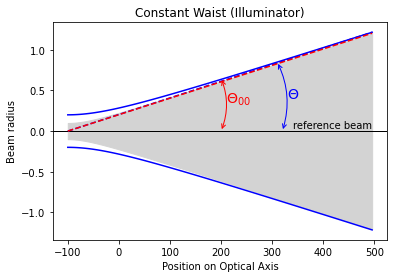

In [5]:

M2=2
w0=0.1                    # radius of beam waist [mm]
z0=-100                   # z-axis position of beam waist [mm]
lambda0=0.6328/1000       # again in mm
M = np.sqrt(M2)
zR = M2 * lbs.z_rayleigh(w0, lambda0)
z = np.linspace(0,6*zR,100)-100
r = lbs.beam_radius(w0, lambda0, z, M2=M2, z0=z0)
rr = lbs.beam_radius(w0, lambda0, z, z0=z0)

plt.title('Constant Divergence (Laboratory)')
plt.fill_between(z,-rr,rr,color='lightgray')
plt.text(z[-1],0.04, r"reference beam",ha='right')
rmin = min(r)*np.sqrt(2)
rrmin = min(rr)*np.sqrt(2)
plt.title('Constant Waist (Illuminator)')
plt.xlabel("Position on Optical Axis")
plt.ylabel("Beam radius")
plt.plot(z,+r,color='blue')
plt.plot(z,-r,color='blue')
plt.axhline(0,color='black',lw=1)

Theta00 = w0/lbs.z_rayleigh(w0, lambda0)/2
Theta = M2 * Theta00

plt.plot([z0,z[-1]],[0,r[-1]],'--b')

plt.plot([z0,z[-1]],[0,rr[-1]],'--r')


plt.text(210, 0.4, r'$\Theta_{00}$', fontsize=14,va='center',color='red')
plt.annotate('',xy=(200,0.65),xytext=(200,0),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->",color='red'))

plt.text(330,0.45,r'$\Theta$', fontsize=14,va='center',color='blue')
plt.annotate('',xy=(310,0.85),xytext=(320,0),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->", color='blue'))
plt.show()

### Embedded Gaussian or matching Rayleigh distance

And finally, the original theoretical version that arose from integrating over various modes:

$$
w_\mathrm{theory}^2(z)=w_{00}^2M^2\left(1+\frac{(z-z_0)^2}{z_{R00}^2}\right)
$$

We find that a multimode beam has a beam waist which is $M$ times larger and a beam divergence that is $M$ times larger

$$
w(z_0) = M \cdot w_{00}
$$

and the divergences are related by

$$
\Theta = M \cdot \Theta_{00}
$$



### Visual comparison

These three variants are shown below.  Each multimode beam has the same value of $M^2$, but the Gaussian beam that is used as a reference has a different beam waist (and therefore different divergence as well).

The reference Gaussian beam and the multimode beam can be seen to have

* **matching divergences** in the far-field for the laboratory case.

* **matching beam waists** for the illuminator case.

* **matching Rayleigh distances** for the embedded gaussian case.

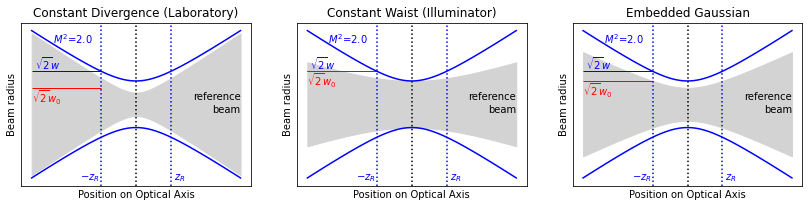

In [7]:
def add_plot_details(z0, zR, z, r, rr, M2):
    plt.fill_between(z,-rr,rr,color='lightgray')
    plt.text(z[-1],0.04, r"reference",ha='right')
    plt.text(z[-1],-0.07, r"beam",ha='right')
    rmin = min(r)*np.sqrt(2)
    rrmin = min(rr)*np.sqrt(2)
    plt.title('Constant Divergence (Laboratory)')
    plt.xlabel("Position on Optical Axis")
    plt.ylabel("Beam radius")
    plt.xticks([])
    plt.yticks([])
    plt.axvline(z0+zR, color='blue', linestyle=':')
    plt.axvline(z0-zR, color='blue', linestyle=':')
    plt.text(z0+zR, -0.65, ' $z_R$', color='blue')
    plt.text(z0-zR, -0.65, '$-z_R$ ', ha='right', color='blue')
    plt.axvline(z0, color='black', linestyle=':')
    plt.hlines(rmin,z[0],z0-zR, color='blue', linewidth=1)
    plt.hlines(rrmin,z[0],z0-zR, color='red', linewidth=1)
    plt.text(z[0], rmin, r' $\sqrt{2}w$', va='bottom', color='blue')
    plt.text(z[0], rrmin, r'$\sqrt{2}w_0$', va='top', color='red')
    plt.ylim(-0.7,0.7)
    plt.plot(z,+r,color='blue')
    plt.plot(z,-r,color='blue')
    plt.text(z[10],0.5,'$M^2$=%.1f'%M2, ha='left', va='bottom', color='blue')

M2=2
w0=0.1                    # radius of beam waist [mm]
z0=-100                   # z-axis position of beam waist [mm]
lambda0=0.6328/1000       # again in mm
M = np.sqrt(M2)
zR = M2 * lbs.z_rayleigh(w0, lambda0)
z = np.linspace(-3*zR,3*zR,100)-100
r = lbs.beam_radius(w0, lambda0, z, M2=M2, z0=z0)

plt.subplots(1,3,figsize=(14,3))

plt.subplot(1,3,1)
rr = lbs.beam_radius(w0, lambda0, z ,z0=z0)
add_plot_details(z0, zR, z, r, rr, M2)
plt.title('Constant Divergence (Laboratory)')

plt.subplot(1,3,2)
rr = lbs.beam_radius(w0*M2, lambda0, z, M2=1, z0=z0)
add_plot_details(z0, zR, z, r, rr, M2)
plt.title('Constant Waist (Illuminator)')

plt.subplot(1,3,3)
rr = lbs.beam_radius(w0*M, lambda0, z, z0=z0)
add_plot_details(z0, zR, z, r, rr, M2)
plt.title("Embedded Gaussian")
plt.show()

## ISO11146 definition of $M^2$

When one has experimental values for the beam diameters at different axial locations $z$, it is natural to express the beam size as a function of position in terms of the measured values (instead of using an unknown reference beam).  If $d_\sigma(z)$ is the beam diameter measured using the ISO 11164 method at an axial location $z$, then the general expression for the real beam diameter is

$$
d^2_\sigma(z) = d^2_\sigma(z_0) + M^4 \left(\frac{2\lambda}{\pi d_\sigma(z_0)}\right)^2 (z-z_0)^2
$$

